<h2> Описание проекта<a class="tocSkip"></h2>


    Проектным заданием является анализ продаж интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. 
    Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
    Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    Представлены данные до 2016 года, предполагается кампания на  2017-й. Нужно отработать принцип работы с данными. 

<b> Шаг 1. Открываем файл с данными и изучаем общую информацию </b>

In [106]:
import pandas as pd
data=pd.read_csv('/datasets/games.csv')  #открываю датасет
display(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<b>Шаг 2. Подготовка данных</b> 

<b>2.1. Замена названий столбцов (приведение к нижнему регистру)</b>

In [107]:
data.columns = map(str.lower, data.columns) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<b>2.2 Преобразование данных в нужные типы. Удаление пропусков данных при необходимости </b>

In [108]:
data=data.dropna(subset=['year_of_release','name']) 

data['year_of_release']=data['year_of_release'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Комментарий:
Удаляю пропуски из столбцов с годом релиза и названием, т.к. их не слишком много и адекватной замены пропускам из имеющихся данных нет.

Привожу столбцы 'year_of_release' к целочисленному типу. Столбец critic_score не стала приводить к целочисленному, т.к. далее при построении диграммы рассеяния возникает ошибка.


<b>2.3 Анализ значений tbd в столбце с оценкой пользователей</b>

In [109]:
print(data.loc[data['user_score']=='tbd'].head(10))

                                name platform  year_of_release       genre  \
119                    Zumba Fitness      Wii             2010      Sports   
301   Namco Museum: 50th Anniversary      PS2             2005        Misc   
520                  Zumba Fitness 2      Wii             2011      Sports   
645                     uDraw Studio      Wii             2010        Misc   
718                  Just Dance Kids      Wii             2010        Misc   
726        Dance Dance Revolution X2      PS2             2009  Simulation   
821                  The Incredibles      GBA             2004      Action   
881    Who wants to be a millionaire       PC             1999        Misc   
1047                   Tetris Worlds      GBA             2001      Puzzle   
1048                Imagine: Teacher       DS             2008  Simulation   

      na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
119       3.45      2.59      0.00         0.66           NaN    

Комментарий:
По результатам анализа строк со значением 'tbd' в столбце 'user_score' видно, что это игры, еще не получившие оценки.  Произвожу замену значений tbd на nan для корректности будущих вычислений.


In [110]:
import numpy as np
data.loc[data['user_score']=='tbd','user_score'] = np.nan
data['user_score']=data['user_score'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


<b> 2.4. Дополнительный анализ необходимости заполнения пропусков, а также выявление возможных причин пропусков в данных</b>

После выполнения указанных операций датасет уменьшился до 14068 строк

In [111]:
print(data['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Комментарий:
в столбце 'rating' замену пропусков производить не буду, т.к. механизма определения рейтинга из данных остальных столбцов не усматривается.

Причинами пропусков могут быть ошибки, допущенные при заполнении базы данных, либо программные ошибки при обработке данных.

<b>2.5 Подсчет данных о суммарных продажах по регионам с занесением в отдельный столбец</b>

In [112]:
data['sum_sale']=data[['na_sales','eu_sales','jp_sales','other_sales' ]].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Комментарий:
добавлен столбец 'sum_sale' с суммой продаж по всем регионам.

<b>3. Исследовательский анализ данных</b>

<b>3.1. Подсчет количества игр по годам и анализ необходимости учета данных за все годы</b>

<AxesSubplot:xlabel='year_of_release'>

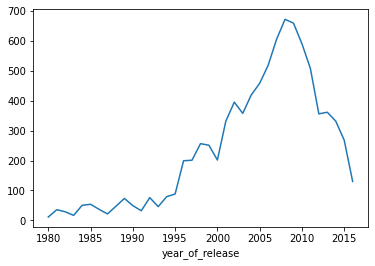

In [113]:
# анализ объемов продаж по годам
data.groupby('year_of_release')['sum_sale'].sum().plot()

Провела анализ продаж по годам. 
Из анализа данных по объемам продаж по годам можно сделать вывод, что данными за период 1980-1991 годы можно пренебречь ввиду малозначительности по сравнению с более поздними годами. 

<b>3.2. Подсчет продаж по платформам. Выбор платформ с наибольшими суммарными продажами.</b>

In [114]:
#анализ продаж по платформам
print(data.groupby('platform')['sum_sale'].sum().sort_values(ascending=False))

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sum_sale, dtype: float64


Провела анализ продаж по платформам. 
Наиболее популярными платформами являются 
PS2, X360, PS3, Wii.
Далее по 10 топ платформ строю распределение по годам в целях выявления срока образования новых платформ

<b> 3.3 Построение распределения по годам по 10 топ платформ. Определение характерного срока жизни платформ. </b>

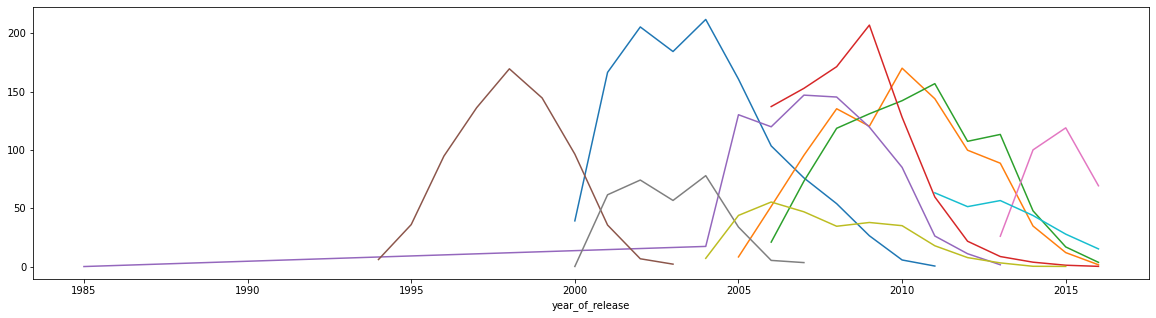

In [115]:
import matplotlib.pyplot as plt
list_10=data.groupby('platform')['sum_sale'].sum().sort_values(ascending=False).head(10).reset_index()
list_10_pl=list_10['platform']
plt.figure(figsize=(20,5))
for top in list_10_pl:
    data[data['platform']==top].groupby('year_of_release')['sum_sale'].sum().plot()


Исходя из построенных распределений по 10 топ платформам, средний срок от образования платформы до пика продаж составляет 3-4 года, далее происходит спад. Исходя из анализа гистограмм актуальным периодом является промежуток между 2012-2016 годами. Ввиду того, что далее анализ должен проводиться на актуальных данных, убираю из датафрейма информацию о продажах за период до 2012 года.

<b> 3.4. Общий анализ динамики продаж игр за актуальный период </b>

<AxesSubplot:xlabel='year_of_release'>

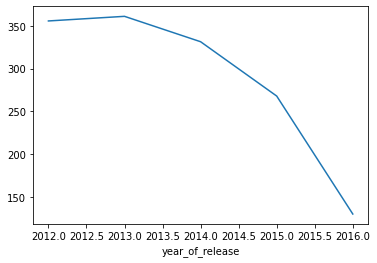

In [116]:
data=data.loc[data['year_of_release']>=2012]
data.groupby('year_of_release')['sum_sale'].sum().plot()

Построила график продаж по годам за период с 2012 года. Анализ динамики суммарных продаж игр за период с 2012 года показывает, что после 2013 года продажи постепенно падают.

<b> 3.5. Анализ данных о том, какие платформы лидируют по продажам, растут или падают. Выбор нескольких потенциально прибыльных платформ.</b>

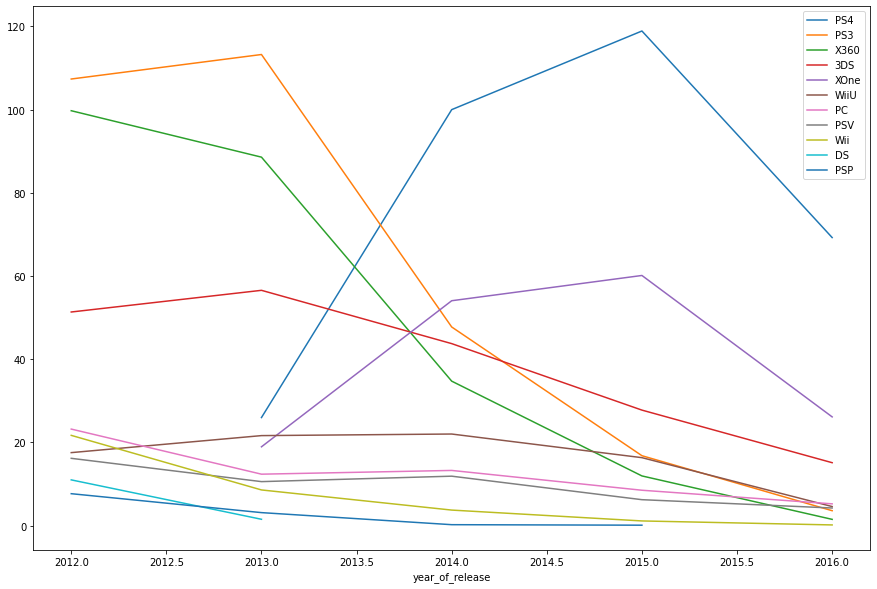

In [117]:
list_20=data.groupby('platform')['sum_sale'].sum().sort_values(ascending=False).head(20).reset_index()
list_20_pl=list_20['platform']
plt.figure(figsize=(15,10))
plt.legend(list_20_pl)
for top in list_20_pl:
    data[data['platform']==top].groupby('year_of_release')['sum_sale'].sum().plot()
plt.legend(list_20_pl)


Далее строю графики продаж по 20 самым крупным платформам за актуальный период.
Анализ динамики продаж по ним отображает, что большинство платформ теряют популярность, например, Wii, DS, однако платформа PS4 и XOne являются перспективными.

<b> 3.6. Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описание результата.</b>

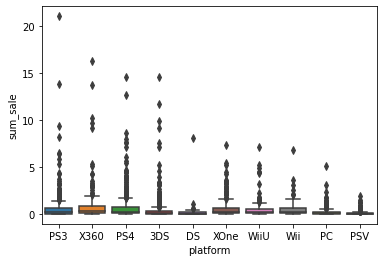

<Figure size 1440x1080 with 0 Axes>

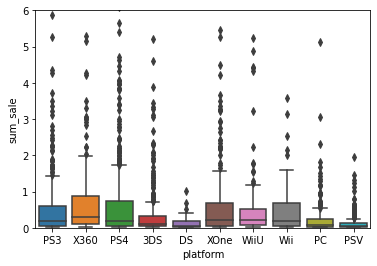

<Figure size 1440x1080 with 0 Axes>

In [118]:
data_sorted=data.groupby('platform')['sum_sale'].sum().sort_values(ascending=False).head(10)
data_sorted=data_sorted.reset_index()
data_max10=data.loc[data['platform'].isin(data_sorted['platform'])]

import seaborn as sns
sns.boxplot(x=data_max10['platform'], y=data_max10['sum_sale'])
plt.figure(figsize=(20,15))
plt.show()

sns.boxplot(x=data_max10['platform'], y=data_max10['sum_sale'])
plt.ylim(0,6)
plt.figure(figsize=(20,15))
plt.show()


Построила график "Ящик с усами" для 10 наиболее популярных платформ, в начальной редакции по вертикали были значения sum_sale до 20, однако по большому счету это выбросы, мешающие анализировать данные по платформам. Установила лимит до 6, в результате видно, что наиболее популярные платформы - это  X360, PS3, PS4,XOne.

<b> 3.7. Анализ влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков. Построение диаграммы рассеяния и расчет корреляции между отзывами и продажами. Формулировка выводов.</b>

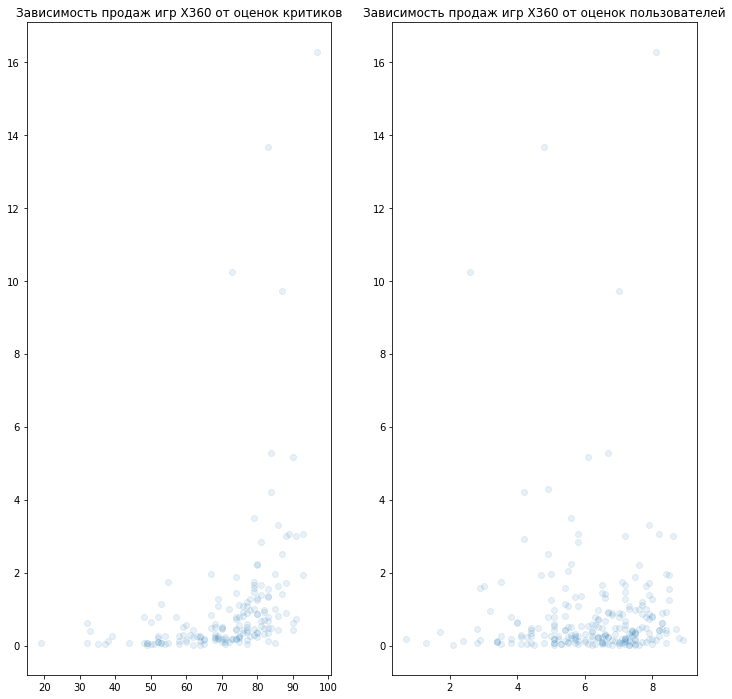

In [119]:
fig, axes = plt.subplots(1, 2)
axes[0].scatter( data=data_max10.query('platform =="X360"'), x='critic_score', y='sum_sale', alpha=0.1)
axes[0].set_title('Зависимость продаж игр X360 от оценок критиков')
axes[1].scatter( data=data_max10.query('platform =="X360"'), x='user_score', y='sum_sale', alpha=0.1)
axes[1].set_title('Зависимость продаж игр X360 от оценок пользователей')
fig.set_figwidth(12)   
fig.set_figheight(12)   

Построила диаграммы рассеяния для зависимости продаж на платформе X360 от оценок критиков и от оценок пользователей. Видна общая  взаимосвязь продаж с оценками, чем выше оценки, тем больше продаж зафиксировано. Наиболее популярными оценками являются чуть выше 70 и 6 соответственно. При оценках ниже этого значения продажи  падают, при оценках выше продажи показывают существенный рост.

In [120]:
data_sorted_3=data.groupby('platform')['sum_sale'].sum().sort_values(ascending=False).head(3)
data_sorted_3=data_sorted.reset_index()
data_max3=data.loc[data['platform'].isin(data_sorted_3['platform'])]

print('Корреляция по платформе X360 между отзывами критиков и продажами составляет: ',data_max3.query('platform =="X360"')['critic_score'].corr(data_max3.query('platform =="X360"')['sum_sale']))
print('Корреляция по платформе X360 между отзывами пользователей и продажами составляет: ',data_max3.query('platform =="X360"')['user_score'].corr(data_max3.query('platform =="X360"')['sum_sale']))

Корреляция по платформе X360 между отзывами критиков и продажами составляет:  0.3605734888507336
Корреляция по платформе X360 между отзывами пользователей и продажами составляет:  0.006163978646213326


Коэффициенты корреляции Пирсона по платформе X360 показывают сильную связь между отзывами критиков и продажами (0,36), а в части зависимости продаж от отзывов пользователей связи практически нет - менее 1%.

In [121]:
print('Общая корреляция по 3 популярным платформам между отзывами критиков и продажами составляет: ',data_max3['critic_score'].corr(data_max3['sum_sale']))
print('Общая корреляция по 3 популярным платформам  между отзывами пользователей и продажами составляет: ',data_max3['user_score'].corr(data_max3['sum_sale']))

Общая корреляция по 3 популярным платформам между отзывами критиков и продажами составляет:  0.30826115735443727
Общая корреляция по 3 популярным платформам  между отзывами пользователей и продажами составляет:  0.0042420006767442545


Общая корреляция по указанным параметрам по 3 наиболее популярным платформам показывает чуть более низкий результат : 0,3 и 0,004 соответственно. В последнем случае зависимости практически нет.

<b> 3.8.Анализ общего распределения игр по жанрам. Определение  самых прибыльных жанров. Определение жанров с высокими и низкими продажами </b>

<AxesSubplot:xlabel='genre'>

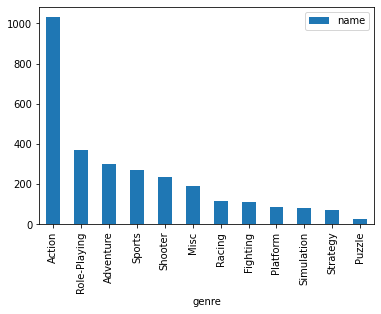

In [122]:
data.groupby('genre').agg({'name':'count'}).sort_values(by='name', ascending=False).plot(kind='bar')


Построила таблицу популярности игр по жанрам.
Общее распределение игр по жанрам является следующим - наиболее популярным жанром является Action, далее со значительным отрывом идут ROle-Playing,Adventure,Sports, Shooter,Misc.

<AxesSubplot:xlabel='genre'>

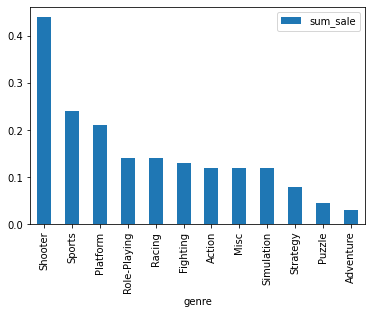

In [123]:
data.groupby('genre').agg({'sum_sale':'median'}).sort_values(by='sum_sale', ascending=False).plot(kind='bar')

Построила таблицу прибыльности игр по жанрам.
Анализ прибыльности жанров проведен на основании данных о медианных суммарных продажах. Согласно указанных сведений явным лидером по прибыльности являются игры жанра  Shooter, Sports, Platform, . Наименее прибыльными являются пазлы, стратегии и игры жанра Adventure.

<b> 4. Составление портрета пользователя каждого региона

4.1. Определение для пользователя каждого региона (NA, EU, JP) топ-5 платформ. Определение различий в долях продаж. </b>

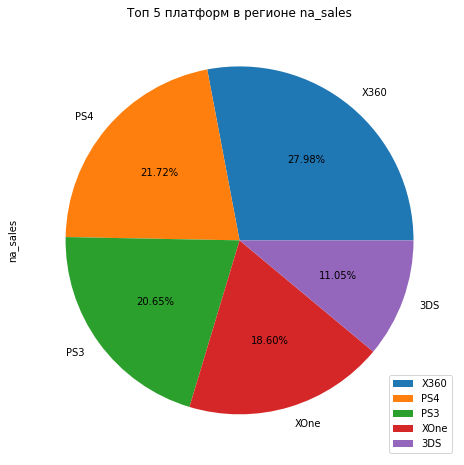

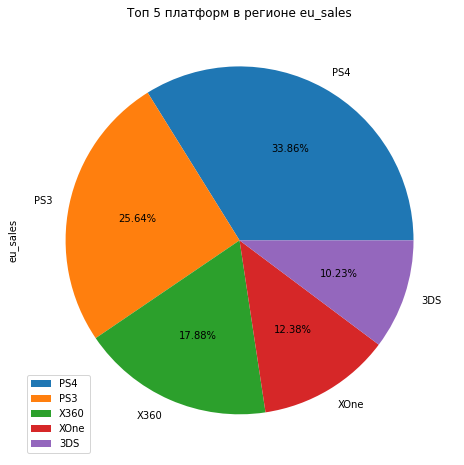

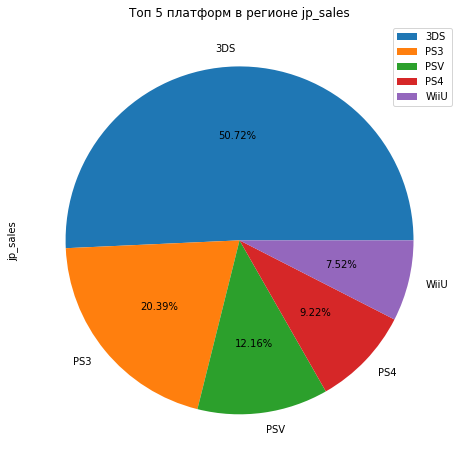

In [124]:
for reg in ['na_sales', 'eu_sales', 'jp_sales']:
    data.pivot_table(index='platform', values=reg, aggfunc='sum').sort_values(by=reg, ascending=False).head().plot(kind='pie', subplots=True, figsize=(8,8), autopct='%1.2f%%')
    plt.title(f'Топ 5 платформ в регионе {reg}')

Далее построила диаграммы популярности платформ в разных регионах.

В регионе NA  самые популярные платформы это X360,PS4, PS3, XOne , доли в продажах очень похожи, далее с незначительным отрывом идtт  3DS .

В регионе EU самые популярные платформы это PS4, PS3 , X360.    

В регионе JP самые популярные платформы это 3DS , PS3 , PSV 

<b>4.2. Определение для пользователя каждого региона (NA, EU, JP) топ-5 жанров. Выявление различий </b>

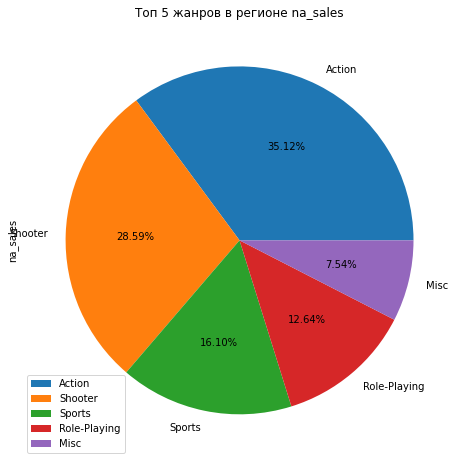

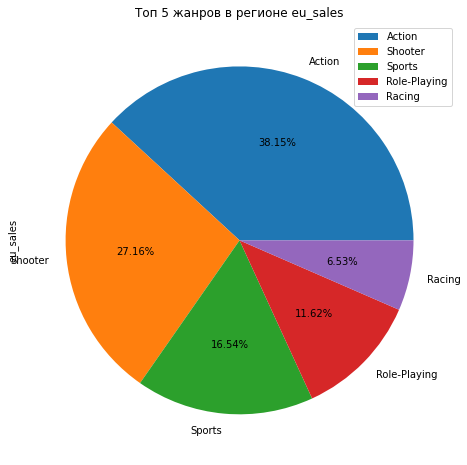

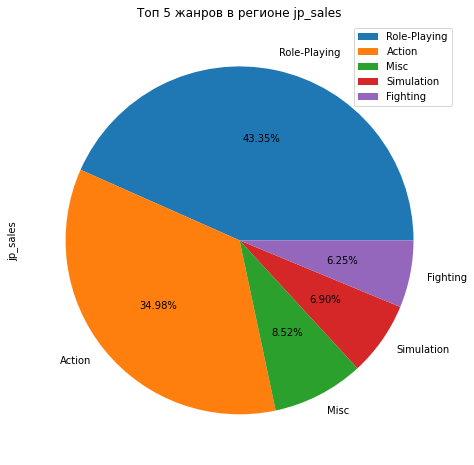

In [125]:
for reg in ['na_sales', 'eu_sales', 'jp_sales']:
    data.pivot_table(index='genre', values=reg, aggfunc='sum').sort_values(by=reg, ascending=False).head().plot(kind='pie', subplots=True, figsize=(8,8), autopct='%1.2f%%')
    plt.title(f'Топ 5 жанров в регионе {reg}')

Также построила диаграммы популярности жанров по регионам.

В регионе NA самые популярные жанры - Action ,  Shooter, Sports .

В регионе EU самые популярные жанры  также - Action ,  Shooter, Sports .

В регионе JP самые популярные жанры - Role_playing , Action , Misc .



<b>4.3. Определение влияния рейтинга ESRB на продажи каждого региона </b>

Влияние рейтинга ESRB на продажи в регионе AxesSubplot(0.125,0.125;0.775x0.755)

Влияние рейтинга ESRB на продажи в регионе AxesSubplot(0.125,0.125;0.775x0.755)

Влияние рейтинга ESRB на продажи в регионе AxesSubplot(0.125,0.125;0.775x0.755)



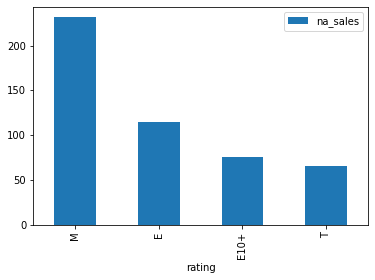

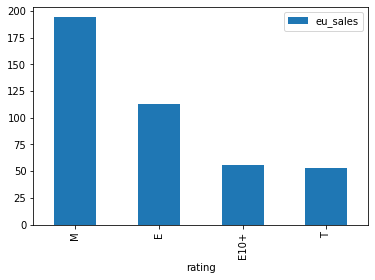

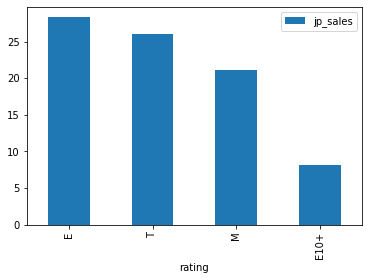

In [126]:
for reg in ['na_sales', 'eu_sales', 'jp_sales']:
    print('Влияние рейтинга ESRB на продажи в регионе', data.pivot_table(index='rating', values=reg, aggfunc='sum').sort_values(by=reg, ascending=False).head(10).plot(kind='bar'))
    print('')

Изучила влияние рейтинга ESRB на продажи по регионам.

Судя по таблицам продаж в регионах по рейтингу ESRB,  в Северной Америке  лидируют продажи игр с рейтингами M,E,E10+,T.
В Европе лидируют продажи игр с рейтингами M,E,T, E10+.

В Японии же также лидером являются игры с рейтингом E, однако далее идут игры с рейтингом T, далее M.  

Также из таблицы видно, что в Японии значительно меньшее количество игр имеют присвоенный рейтинг ESRB.

<b> 5. Проверка гипотезы</b>

<b>5.1. Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые </b>

альтернативная гипотеза -  Средние пользовательские рейтинги платформ Xbox One и PC не совпадают.

In [127]:
#проверка гипотезы - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
from scipy import stats as st
import numpy as np

data_rating_xone=data.loc[data['platform']=="XOne"]['user_score'].tolist()

data_rating_pc=data.loc[data['platform']=="PC"]['user_score'].tolist()


alpha = 0.03

results =st.ttest_ind(data_rating_xone, data_rating_pc, nan_policy='omit') 

print('p-значение:',results.pvalue)

if results.pvalue< alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 0.5535080500643738
Не получилось отвергнуть нулевую гипотезу


Проведена проверка гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC.  

В целях формирования нулевой и альтернативной гипотез из датафрейма сформированы списки пользовательских рейтингов игр платформ Xbox One и PC. Выбран уровень статической значимости 3% (среднее в диапазоне от 1% до 5%). Далее применен специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind. 

Согласно проведенного анализа  гипотеза о равестве средних пользовательских рейтингов подтверждена.

<b>5.2. Нулевая гипотеза - Средние пользовательские рейтинги  жанров Action  и Sports одинаковые </b>

альтернативная гипотеза -  Средние пользовательские рейтинги жанров Action  и Sports не совпадают.

In [128]:
#проверка гипотезы - Средние пользовательские рейтинги жанров Action  и Sports  разные.
from scipy import stats as st
import numpy as np

data_rating_action=data.loc[data['genre']=="Action"]['user_score'].tolist()
data_rating_sports=data.loc[data['genre']=="Sports"]['user_score'].tolist()

alpha = 0.03

results =st.ttest_ind(data_rating_action, data_rating_sports,nan_policy='omit') 

print('p-значение:',results.pvalue)

if results.pvalue< alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


Проведена проверка гипотезы о о том, что Средние пользовательские рейтинги жанров Action  и Sports  разные.  

В целях формирования нулевой и альтернативной гипотез из датафрейма сформированы списки пользовательских рейтингов игр жанров Action и Sports. Выбран уровень статической значимости 3% (среднее в диапазоне от 1% до 5%). Далее применен специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind. 

Согласно проведенного анализа гипотеза о том, что средние пользовательские рейтинги жанров Action  и Sports  разные, подтверждена.

<b> 6.Общий вывод по результатам исследования.</b>

В целях выполнения настоящего исследования проведен анализ данных датафрейма о данных по продажам игр по различным жанрам и регионам за период с 1991 года по 2016 год общим объемом более 16 тысяч строк.

В рамках подготовки данных к анализу проведена предобработка:
- приведение столбцов к нижнему регистру, 
- удаление пропусков из столбцов с годом релиза и названием, т.к. их не слишком много и адекватной замены пропускам из имеющихся данных нет. 
- приведение столбца 'year_of_release' к целочисленному типу.

Далее проведен анализ строк со значением 'tbd' в столбце 'user_score'. Из полученной информации сделан вывод, что  это данные об играх с очень малым объемом продаж во всех странах, объема продаж не хватило для формирования рейтинга у пользователей. В целях заполнения пропусков в указанном столбце  значение 'tbd' удалено. Далее  указанный столбец приведен к типу float для успешного построения диаграмм рассеяния.

После выполнения указанных операций датасет уменьшился до 14 тысяч строк. Причинами пропусков в данных могут быть ошибки, допущенные при заполнении базы данных, либо программные ошибки при обработке данных.

Далее в ходе предобработки добавлен столбец 'sum_sale' с суммой продаж по всем регионам.

Провела анализ продаж по годам. Из анализа данных по объемам продаж по годам можно сделать вывод, что данными за период 1980-1991 годы можно пренебречь ввиду малозначительности по сравнению с более поздними годами.


Провела анализ продаж по платформам. Наиболее популярными платформами являются PS2, X360, PS3, Wii. Далее по по 10 топ платформ  построено распределение по годам в целях выявления срока образования новых платформ.

Характерным сроком образования новых платформ является 3-4 года, далее идет спад. Исходя из анализа гистограмм актуальным периодом является промежуток между 2012 и 2016 годами. Ввиду того, что далее анализ должен проводиться на актуальных данных, убираю из датафрейма информацию о продажах за период до 2012 года.

Построила график продаж по годам за период с 2012 года. Анализ динамики суммарных продаж игр за период с 2012 года показывает, что после 2013 года продажи постепенно падают.

Далее построены графики продаж по 20 самым крупным платформам за актуальный период.
Анализ динамики продаж по ним отображает, что большинство платформ теряют популярность, например, Wii, DS, однако платформа PS4,XOne является перспективной.

Также график "Ящик с усами" для 10 наиболее популярных платформ, в начальной редакции по вертикали были значения sum_sale до 20, однако по большому счету это выбросы, мешающие анализировать данные по платформам. Установила лимит до 6, в результате видно, что наиболее популярные платформы - это  X360, PS3, PS4,XOne.

Построила диаграммы рассеяния для зависимости продаж на платформе PS2 от оценок критиков и от оценок пользователей. Видна явная взаимосвязь продаж с оценками, чем выше оценки, тем больше продаж зафиксировано. Наиболее популярными оценками являются чуть выше 70 и 6 соответственно. При оценках ниже этого значения продажи падают, при оценках выше продажи показывают существенный рост.

Коэффициенты корреляции Пирсона по платформе X360 показывают линейную связь между отзывами критиков и продажами -0,36. А в части зависимости продаж от отзывов пользователей связи практически нет, около 0.
Общая корреляция по указанным параметрам по 3 наиболее популярным платформам показывает чуть более низкий результат : 0,3 и 0 соответственно. В последнем случае зависимости практически нет.

Построила таблицу популярности игр по жанрам. Общее распределение игр по жанрам является следующим - наиболее популярным жанром является Action, далее со значительным отрывом идут ROle-Playing,Adventure,Sports, Shooter,Misc.

Построила таблицу прибыльности игр по жанрам. Анализ прибыльности жанров проведен на основании данных о медианных суммарных продажах. Согласно указанных сведений явным лидером по прибыльности являются игры жанра Shooter, Sports, Platform, . Наименее прибыльными являются пазлы, стратегии и игры жанра Adventure.

Далее построила диаграммы популярности платформ в разных регионах.
В регионе NA самые популярные платформы это X360,PS4, PS3, XOne , доли в продажах очень похожи, далее с незначительным отрывом идет 3DS .
В регионе EU самые популярные платформы это PS4, PS3 , X360.
В регионе JP самые популярные платформы это 3DS , PS3 , PSV

Также построила диаграммы популярности жанров по регионам.

В регионе NA самые популярные жанры - Action ,  Shooter, Sports .
В регионе EU самые популярные жанры  также - Action ,  Shooter, Sports .
В регионе JP самые популярные жанры - Role_playing , Action , Misc .


Изучила влияние рейтинга ESRB на продажи по регионам.

Судя по таблицам продаж в регионах по рейтингу ESRB,  в Северной Америке  лидируют продажи игр с рейтингами M,E,E10+,T.
В Европе лидируют продажи игр с рейтингами M,E,T, E10+.
В Японии же также лидером являются игры с рейтингом E, однако далее идут игры с рейтингом T, далее M.  
Также из таблицы видно, что в Японии значительно меньшее количество игр имеют присвоенный рейтинг EESRB


Проведена проверка гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC.

В целях формирования нулевой и альтернативной гипотез из датафрейма сформированы списки пользовательских рейтингов игр платформ Xbox One и PC. Выбран уровень статической значимости 3% (среднее в диапазоне от 1% до 5%). Далее применен специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind.

Согласно проведенного анализа гипотеза о равестве средних пользовательских рейтингов подтверждена.


Проведена проверка гипотезы о о том, что Средние пользовательские рейтинги жанров Action и Sports разные.

В целях формирования нулевой и альтернативной гипотез из датафрейма сформированы списки пользовательских рейтингов игр жанров Action и Sports. Выбран уровень статической значимости 3% (среднее в диапазоне от 1% до 5%). Далее применен специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind.

Согласно проведенного анализа гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные, подтверждена.

Основные выявленные зависимости:
- доля продаж значительно зависит от оценок критиков;
- доля продаж практически не зависит от оценок пользователей;
- после 2013 года продажи стабильно падают;
- перспективными платформами можно назвать PS4 и XOne;
- средние пользовательские рейтинги платформ Xbox One и PC за последние 4 года выборки совпадают;
- при прогнозировании данных на следующие годы целесообразно собирать статистику за 3-4 года, т.к. это соответствует периоду от возникновения платформы до пика ее популярности;
- средние пользовательские рейтинги жанров Action и Sports за последние 4 года выборки также совпадают;
- в Северной Америке и Европе наиболее популярным жанром игр является Action, в Японии -  role-playing;
